# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.12.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "dataset/training_set",
    image_size=(64, 64),
    batch_size=32
)

Found 8000 files belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "dataset/test_set",
    image_size=(64, 64),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [14]:
cnn = tf.keras.models.Sequential()

### Step 1 - Data Augmentation

In [15]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal", input_shape=(64,64,3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1)
    ]
)

cnn.add(data_augmentation)

### Step 2 - Rescaling

In [16]:
cnn.add(tf.keras.layers.Rescaling(1./255))

### Step 3 - Convolution

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))

### Step 4 - Pooling

In [18]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 5 - Dropout

In [20]:
cnn.add(tf.keras.layers.Dropout(0.2))

### Step 6 - Flattening

In [21]:
cnn.add(tf.keras.layers.Flatten())

### Step 7 - Full Connection

In [22]:
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))

### Step 8 - Output Layer

In [23]:
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

## Part 3 - Training the CNN

### Compiling the CNN

In [24]:
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

### Training the CNN on the Training set and evaluating it on the Test set

In [25]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
250/250 [==============================] - 13s 47ms/step - loss: 0.6752 - accuracy: 0.5847 - val_loss: 0.6309 - val_accuracy: 0.6555
Epoch 2/25
250/250 [==============================] - 12s 49ms/step - loss: 0.6169 - accuracy: 0.6618 - val_loss: 0.5967 - val_accuracy: 0.6785
Epoch 3/25
250/250 [==============================] - 11s 44ms/step - loss: 0.5811 - accuracy: 0.6933 - val_loss: 0.5581 - val_accuracy: 0.7220
Epoch 4/25
250/250 [==============================] - 11s 44ms/step - loss: 0.5620 - accuracy: 0.7082 - val_loss: 0.5372 - val_accuracy: 0.7360
Epoch 5/25
250/250 [==============================] - 11s 44ms/step - loss: 0.5569 - accuracy: 0.7106 - val_loss: 0.5222 - val_accuracy: 0.7475
Epoch 6/25
250/250 [==============================] - 11s 44ms/step - loss: 0.5376 - accuracy: 0.7243 - val_loss: 0.5189 - val_accuracy: 0.7320
Epoch 7/25
250/250 [==============================] - 11s 44ms/step - loss: 0.5224 - accuracy: 0.7412 - val_loss: 0.5376 - val_accuracy:

### Model Accuracy and Loss Visualize

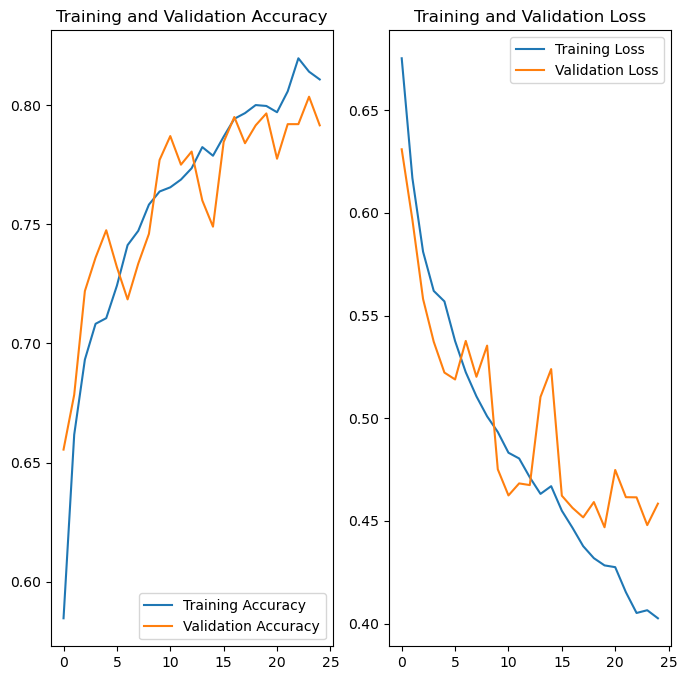

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part 4 - Making a single prediction

In [40]:
test_image = tf.keras.utils.load_img("dataset/single_prediction/cat_or_dog_4.jpg", target_size=(64, 64))
image_array = tf.keras.utils.img_to_array(test_image)
image_array = tf.expand_dims(image_array, 0)

result = cnn.predict(image_array)
if result[0][0] > 0.5:
    prediction = f"Dog, {round(result[0][0] * 100)}%"
else:
    prediction = f"Cat, {round((1-result[0][0]) * 100)}%"

print(prediction)

1/1 [==============================] - 0s 14ms/step
Dog, 94%
